In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [5]:
data=pd.read_csv("C:\\Users\\admin\\Downloads\\weather_classification_data.csv")

In [7]:
len(data)

13200

In [9]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [11]:
data['Weather Type'].unique

<bound method Series.unique of 0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object>

In [13]:
#sunny=0,cloudy=1,snowy=2,rainy=3
weather=OrdinalEncoder(categories=[['Sunny','Cloudy','Snowy',"Rainy"]])
data['Weather Type']=weather.fit_transform(data[['Weather Type']])

In [15]:
data['Season'].unique

<bound method Series.unique of 0        Winter
1        Spring
2        Spring
3        Spring
4        Winter
          ...  
13195    Summer
13196    Winter
13197    Autumn
13198    Winter
13199    Autumn
Name: Season, Length: 13200, dtype: object>

In [17]:
Season=OrdinalEncoder(categories=[['Spring','Summer','Autumn',"Winter","Rainy"]])


In [19]:
data['Season']=Season.fit_transform(data[['Season']])

In [21]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,3.0,3.5,inland,3.0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,0.0,10.0,inland,1.0
2,30.0,64,7.0,16.0,clear,1018.72,5,0.0,5.5,mountain,0.0
3,38.0,83,1.5,82.0,clear,1026.25,7,0.0,1.0,coastal,0.0
4,27.0,74,17.0,66.0,overcast,990.67,1,3.0,2.5,mountain,3.0


In [23]:
data['Cloud Cover'].unique

<bound method Series.unique of 0        partly cloudy
1        partly cloudy
2                clear
3                clear
4             overcast
             ...      
13195         overcast
13196           cloudy
13197         overcast
13198         overcast
13199         overcast
Name: Cloud Cover, Length: 13200, dtype: object>

In [25]:
cloud=OrdinalEncoder(categories=[['clear','partly cloudy','cloudy','overcast']])
data['Cloud Cover']=cloud.fit_transform(data[['Cloud Cover']])

In [27]:
data['Location'].unique

<bound method Series.unique of 0          inland
1          inland
2        mountain
3         coastal
4        mountain
           ...   
13195    mountain
13196     coastal
13197     coastal
13198      inland
13199    mountain
Name: Location, Length: 13200, dtype: object>

In [29]:
location=OrdinalEncoder(categories=[['coastal','inland','mountain']])
data['Location']=location.fit_transform(data[['Location']])

In [31]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1.0,1010.82,2,3.0,3.5,1.0,3.0
1,39.0,96,8.5,71.0,1.0,1011.43,7,0.0,10.0,1.0,1.0
2,30.0,64,7.0,16.0,0.0,1018.72,5,0.0,5.5,2.0,0.0
3,38.0,83,1.5,82.0,0.0,1026.25,7,0.0,1.0,0.0,0.0
4,27.0,74,17.0,66.0,3.0,990.67,1,3.0,2.5,2.0,3.0


In [33]:
scaler=StandardScaler()
y=data['Weather Type']
x=data.iloc[:,:-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [35]:
len(x_train)

11880

In [37]:
x_trained=scaler.fit_transform(x_train)
x_tested=scaler.transform(x_test)

In [44]:
param={'n_estimators':[100,200,300],
        'max_depth':[None,10,20,30],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4],
        'max_features':['sqrt','log2'],
        'bootstrap':[True,False]}

In [46]:
forest2=RandomForestClassifier()
random=RandomizedSearchCV(estimator=forest2,param_distributions=param,n_iter=50,cv=5,verbose=1,n_jobs=-1)
random.fit(x_trained,y_train)
best_model=random.best_estimator_
y_pred6=best_model.predict(x_tested)
accuracy_score(y_test,y_pred6)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0.9174242424242425

<Axes: >

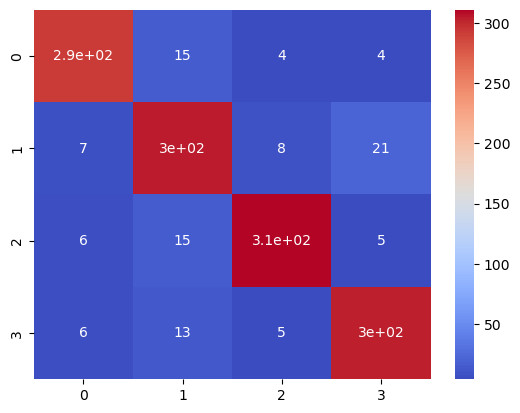

In [52]:
cm_rf=confusion_matrix(y_test,y_pred6)
sns.heatmap(cm_rf,annot=True,cmap='coolwarm')

In [54]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       315
         1.0       0.88      0.89      0.89       341
         2.0       0.95      0.92      0.94       337
         3.0       0.91      0.93      0.92       327

    accuracy                           0.92      1320
   macro avg       0.92      0.92      0.92      1320
weighted avg       0.92      0.92      0.92      1320



In [56]:
logistic=LogisticRegression(max_iter=100000)
logistic.fit(x_trained,y_train)
y_pred2=logistic.predict(x_tested)
accuracy=accuracy_score(y_test,y_pred2)
accuracy

0.8606060606060606

<Axes: >

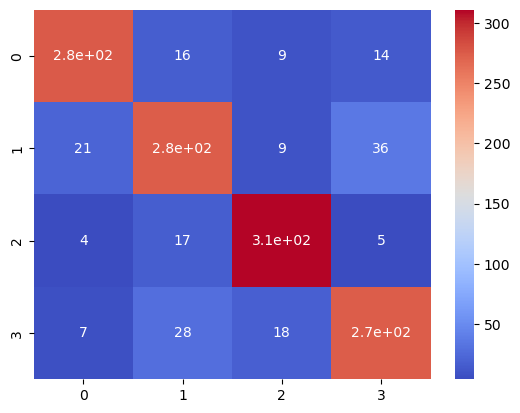

In [58]:
cm_lr=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm_lr,annot=True,cmap='coolwarm')

In [60]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       315
         1.0       0.82      0.81      0.81       341
         2.0       0.90      0.92      0.91       337
         3.0       0.83      0.84      0.84       327

    accuracy                           0.86      1320
   macro avg       0.86      0.86      0.86      1320
weighted avg       0.86      0.86      0.86      1320



In [62]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_trained,y_train)
y_pred3=knn.predict(x_tested)
accuracy=accuracy_score(y_test,y_pred3)
accuracy

0.896969696969697

In [74]:
import numpy as np
param={'n_neighbors':np.arange(1,31),
      'weights':['uniform','distance'],
      'metric':['euclidean','manhattan','minkowski']}
kn=KNeighborsClassifier()
random=RandomizedSearchCV(estimator=kn,param_distributions=param,verbose=2,n_jobs=-1,n_iter=30)
random.fit(x_trained,y_train)
best_knn=random.best_estimator_
y_kn=best_knn.predict(x_tested)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [78]:
accuracy_score(y_test,y_kn)

0.8992424242424243

<Axes: >

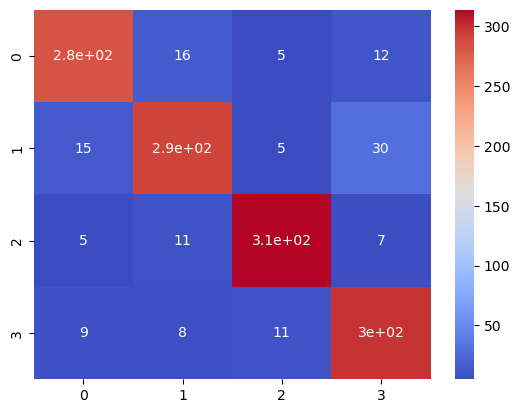

In [72]:
cm_knn=confusion_matrix(y_test,y_kn)
sns.heatmap(cm_knn,annot=True,cmap='coolwarm')

In [75]:
print(classification_report(y_test,y_kn))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       315
         1.0       0.89      0.86      0.88       341
         2.0       0.94      0.92      0.93       337
         3.0       0.86      0.91      0.88       327

    accuracy                           0.90      1320
   macro avg       0.90      0.90      0.90      1320
weighted avg       0.90      0.90      0.90      1320

